<a href="https://colab.research.google.com/github/MJaiman/Data-Analytics/blob/main/Job_Market_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d PromptCloudHQ/jobs-on-naukricom

  0% 0.00/13.6M [00:00<?, ?B/s]
100% 13.6M/13.6M [00:00<00:00, 125MB/s]


In [ ]:
!unzip jobs-on-naukricom.zip

Archive:  jobs-on-naukricom.zip
  inflating: naukri_com-job_sample.csv  


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/naukri_com-job_sample.csv")

In [ ]:
df.head(5)

,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,payrate,postdate,site_name,skills,uniq_id
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,"1,50,000 - 2,25,000 P.A",2016-05-21 19:30:00 +0000,NaN,ITES,43b19632647068535437c774b6ca6cf8
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,"1,50,000 - 2,50,000 P.A. 20000",2016-05-21 19:30:00 +0000,NaN,Marketing,d4c72325e57f89f364812b5ed5a795f0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,4 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bengaluru,Pl/sql Developer - SQL,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,c47df6f4cfdf5b46f1fd713ba61b9eba
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,11 - 15 yrs,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,81016900536,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,Accounts,115d28f140f694dd1cc61c53d03c66ae
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,6 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,120916002122,Bengaluru,JAVA Technical Lead (6-8 yrs) -,4.0,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,a12553fc03bc7bcced8b1bb8963f97b4


In [ ]:
df.columns

Index(['company', 'education', 'experience', 'industry', 'jobdescription',
       'jobid', 'joblocation_address', 'jobtitle', 'numberofpositions',
       'payrate', 'postdate', 'site_name', 'skills', 'uniq_id'],
      dtype='object')

In [ ]:
df.shape

(22000, 14)

In [ ]:
# Visualise Missing Values
count_missing=df.isnull().sum()
count_missing

company                    4
education               1996
experience                 4
industry                   5
jobdescription             4
jobid                      0
joblocation_address      501
jobtitle                   0
numberofpositions      17536
payrate                   97
postdate                  23
site_name              18013
skills                   528
uniq_id                    0
dtype: int64

In [ ]:
percent_missing=count_missing * 100/len(df)
percent_missing

company                 0.018182
education               9.072727
experience              0.018182
industry                0.022727
jobdescription          0.018182
jobid                   0.000000
joblocation_address     2.277273
jobtitle                0.000000
numberofpositions      79.709091
payrate                 0.440909
postdate                0.104545
site_name              81.877273
skills                  2.400000
uniq_id                 0.000000
dtype: float64

In [ ]:
missing_values_df=pd.DataFrame({'count_missing':count_missing,'percent_missing':percent_missing})
missing_values_df

,count_missing,percent_missing
company,4,0.018182
education,1996,9.072727
experience,4,0.018182
industry,5,0.022727
jobdescription,4,0.018182
jobid,0,0.000000
joblocation_address,501,2.277273
jobtitle,0,0.000000
numberofpositions,17536,79.709091
payrate,97,0.440909


In [ ]:
missing_values_df.style.background_gradient(cmap='YlOrRd')

,count_missing,percent_missing
company,4,0.018182
education,1996,9.072727
experience,4,0.018182
industry,5,0.022727
jobdescription,4,0.018182
jobid,0,0.000000
joblocation_address,501,2.277273
jobtitle,0,0.000000
numberofpositions,17536,79.709091
payrate,97,0.440909


In [ ]:
for col in df.columns:
  print("{} has {} unique values".format(col,df[col].nunique()))

company has 8469 unique values
education has 2355 unique values
experience has 147 unique values
industry has 63 unique values
jobdescription has 21063 unique values
jobid has 21910 unique values
joblocation_address has 2329 unique values
jobtitle has 17564 unique values
numberofpositions has 84 unique values
payrate has 1848 unique values
postdate has 4203 unique values
site_name has 1 unique values
skills has 45 unique values
uniq_id has 22000 unique values


In [ ]:
unique=[]
for col in df.columns:
  unique.append([col,df[col].nunique(),df[col].unique()])
unique

[['company', 8469, array(['MM Media Pvt Ltd', 'find live infotech',
         'Softtech Career Infosystem Pvt. Ltd', ...,
         'TeamLease Services Limited hiring for BPA Solution Architect',
         'Austere Technology Solutions', 'Musk - Startup'], dtype=object)],
 ['education',
  2355,
  array(['UG: B.Tech/B.E. - Any Specialization PG:Any Postgraduate - Any Specialization, Post Graduation Not Required',
         'UG: B.Tech/B.E. - Any Specialization PG:MBA/PGDM - Any Specialization',
         'UG: Any Graduate - Any Specialization PG:Any Postgraduate Doctorate:Doctorate Not Required',
         ..., 'PG:MS/M.Sc(Science) - Any Specialization, Statistics',
         'UG: B.Tech/B.E. - Any Specialization PG:MCA - Computers, M.Tech - Any Specialization, MS/M.Sc(Science) - Any Specialization Doctorate:Doctorate Not Required',
         'UG: B.Tech/B.E. - Computers PG:MS/M.Sc(Science) - Computers Doctorate:Doctorate Not Required'],
        dtype=object)],
 ['experience',
  147,
  array(['

In [ ]:
unique_df=[[col,df[col].nunique(),df[col].unique()] for col in df.columns]
unique_df

[['company', 8469, array(['MM Media Pvt Ltd', 'find live infotech',
         'Softtech Career Infosystem Pvt. Ltd', ...,
         'TeamLease Services Limited hiring for BPA Solution Architect',
         'Austere Technology Solutions', 'Musk - Startup'], dtype=object)],
 ['education',
  2355,
  array(['UG: B.Tech/B.E. - Any Specialization PG:Any Postgraduate - Any Specialization, Post Graduation Not Required',
         'UG: B.Tech/B.E. - Any Specialization PG:MBA/PGDM - Any Specialization',
         'UG: Any Graduate - Any Specialization PG:Any Postgraduate Doctorate:Doctorate Not Required',
         ..., 'PG:MS/M.Sc(Science) - Any Specialization, Statistics',
         'UG: B.Tech/B.E. - Any Specialization PG:MCA - Computers, M.Tech - Any Specialization, MS/M.Sc(Science) - Any Specialization Doctorate:Doctorate Not Required',
         'UG: B.Tech/B.E. - Computers PG:MS/M.Sc(Science) - Computers Doctorate:Doctorate Not Required'],
        dtype=object)],
 ['experience',
  147,
  array(['

In [ ]:
count_df=pd.DataFrame(unique_df,columns=['col_name','count','unique'])

In [ ]:
count_df

,col_name,count,unique
0,company,8469,"[MM Media Pvt Ltd, find live infotech, Softtec..."
1,education,2355,[UG: B.Tech/B.E. - Any Specialization PG:Any P...
2,experience,147,"[0 - 1 yrs, 0 - 0 yrs, 4 - 8 yrs, 11 - 15 yrs,..."
3,industry,63,"[Media / Entertainment / Internet, Advertising..."
4,jobdescription,21063,[Job Description Send me Jobs like this Qual...
5,jobid,21910,"[210516002263, 210516002391, 101016900534, 810..."
6,joblocation_address,2329,"[Chennai, Bengaluru, Mumbai, Bengaluru, Kolkat..."
7,jobtitle,17564,"[Walkin Data Entry Operator (night Shift), Wor..."
8,numberofpositions,84,"[nan, 60.0, 4.0, 2.0, 20.0, 3.0, 1.0, 700.0, 8..."
9,payrate,1848,"[1,50,000 - 2,25,000 P.A, 1,50,000 - 2,50,000 ..."


In [ ]:
count_df.style.background_gradient(cmap='Spectral')

In [ ]:
df.columns

Index(['company', 'education', 'experience', 'industry', 'jobdescription',
       'jobid', 'joblocation_address', 'jobtitle', 'numberofpositions',
       'payrate', 'postdate', 'site_name', 'skills', 'uniq_id'],
      dtype='object')

**Data cleaning and featurization on payrate**



In [ ]:
df['payrate'].head(20)

0                               1,50,000 - 2,25,000 P.A
1                        1,50,000 - 2,50,000 P.A. 20000
2                            Not Disclosed by Recruiter
3                            Not Disclosed by Recruiter
4                            Not Disclosed by Recruiter
5                            Not Disclosed by Recruiter
6                               3,00,000 - 6,50,000 P.A
7                            Not Disclosed by Recruiter
8                               1,00,000 - 2,00,000 P.A
9                            Not Disclosed by Recruiter
10                           Not Disclosed by Recruiter
11                           Not Disclosed by Recruiter
12                              1,75,000 - 2,50,000 P.A
13                           Not Disclosed by Recruiter
14                           Not Disclosed by Recruiter
15                           Not Disclosed by Recruiter
16    1,00,000 - 2,00,000 P.A. incentives for achiev...
17                              1,00,000 - 5,00,

In [ ]:
df['payrate'][0]

'1,50,000 - 2,25,000 P.A'

In [ ]:
df['payrate'][0].split('-')[0]

'1,50,000 '

In [ ]:
df['payrate'][0].split('-')[1]

' 2,25,000 P.A'

In [ ]:
len_pay=[]
for pay in df['payrate']:
  len_pay.append(len(str(pay).split('-')))
len_pay

[2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 3,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,


In [ ]:
pd.Series(len_pay).value_counts()

1    17028
2     4682
4      126
3       83
5       54
6       24
7        3
dtype: int64

In [ ]:
payrate_split=df['payrate'].str.split('-',expand=True)
payrate_split

,0,1,2,3,4,5,6
0,"1,50,000","2,25,000 P.A",None,None,None,None,None
1,"1,50,000","2,50,000 P.A. 20000",None,None,None,None,None
2,Not Disclosed by Recruiter,None,None,None,None,None,None
3,Not Disclosed by Recruiter,None,None,None,None,None,None
4,Not Disclosed by Recruiter,None,None,None,None,None,None
...,...,...,...,...,...,...,...
21995,Not Disclosed by Recruiter,None,None,None,None,None,None
21996,"8,50,000","14,00,000 P.A",None,None,None,None,None
21997,Not Disclosed by Recruiter,None,None,None,None,None,None
21998,Not Disclosed by Recruiter,None,None,None,None,None,None


In [ ]:
payrate_split[0][0]

'1,50,000 '

In [ ]:
payrate_split[0]=payrate_split[0].str.strip()

In [ ]:
payrate_split[0].str.replace(',','')

0                            150000
1                            150000
2        Not Disclosed by Recruiter
3        Not Disclosed by Recruiter
4        Not Disclosed by Recruiter
                    ...            
21995    Not Disclosed by Recruiter
21996                        850000
21997    Not Disclosed by Recruiter
21998    Not Disclosed by Recruiter
21999                       1200000
Name: 0, Length: 22000, dtype: object

In [ ]:
payrate_split[0]=payrate_split[0].apply(lambda x:str(x).replace(',',''))

In [ ]:
payrate_split[0]

0                            150000
1                            150000
2        Not Disclosed by Recruiter
3        Not Disclosed by Recruiter
4        Not Disclosed by Recruiter
                    ...            
21995    Not Disclosed by Recruiter
21996                        850000
21997    Not Disclosed by Recruiter
21998    Not Disclosed by Recruiter
21999                       1200000
Name: 0, Length: 22000, dtype: object

In [ ]:
pay=[]
for payrate in payrate_split[0]:
  try:
    if type(float(payrate))==np.float:
      pay.append(payrate)
  except:
    pay.append('missing value')


In [ ]:
pay

['150000',
 '150000',
 'missing value',
 'missing value',
 'missing value',
 'missing value',
 '300000',
 'missing value',
 '100000',
 'missing value',
 'missing value',
 'missing value',
 '175000',
 'missing value',
 'missing value',
 'missing value',
 '100000',
 '100000',
 'missing value',
 'missing value',
 'missing value',
 'missing value',
 '150000',
 'missing value',
 'missing value',
 'missing value',
 '175000',
 '50000',
 '900000',
 'missing value',
 'missing value',
 '500000',
 'missing value',
 'missing value',
 '400000',
 'missing value',
 'missing value',
 'missing value',
 '200000',
 'missing value',
 'missing value',
 'missing value',
 'missing value',
 'missing value',
 'missing value',
 'missing value',
 'missing value',
 'missing value',
 'missing value',
 'missing value',
 'missing value',
 'missing value',
 'missing value',
 'missing value',
 '400000',
 '250000',
 'missing value',
 '300000',
 'missing value',
 'missing value',
 'missing value',
 '50000',
 'missing va

In [ ]:
pd.to_numeric(payrate_split[0],errors='coerce')

0         150000.0
1         150000.0
2              NaN
3              NaN
4              NaN
           ...    
21995          NaN
21996     850000.0
21997          NaN
21998          NaN
21999    1200000.0
Name: 0, Length: 22000, dtype: float64

In [ ]:
pattern='\D.*'

In [ ]:
payrate_split[0].str.replace(pattern,'')

0         150000
1         150000
2               
3               
4               
          ...   
21995           
21996     850000
21997           
21998           
21999    1200000
Name: 0, Length: 22000, dtype: object

In [ ]:
any(map(str.isdigit,payrate_split[0]))

True

In [ ]:
any(map(str.isnumeric,payrate_split[0]))

True

In [ ]:
payrate_split[1][0]

' 2,25,000 P.A'

In [ ]:
payrate_split[1]=payrate_split[1].str.strip()

In [ ]:
payrate_split[1]=payrate_split[1].apply(lambda x:str(x).replace(',',''))

In [ ]:
pattern='\D.*'
payrate_split[1]=payrate_split[1].str.replace(pattern,'')

In [ ]:
payrate_split[1]

0         225000
1         250000
2               
3               
4               
          ...   
21995           
21996    1400000
21997           
21998           
21999    2200000
Name: 1, Length: 22000, dtype: object

In [ ]:
payrate_split.dtypes

0    object
1    object
2    object
3    object
4    object
5    object
6    object
dtype: object

In [ ]:
payrate_split[0]=pd.to_numeric(payrate_split[0],errors='coerce')
payrate_split[1]=pd.to_numeric(payrate_split[1],errors='coerce')


In [ ]:
payrate_split.dtypes

0    float64
1    float64
2     object
3     object
4     object
5     object
6     object
dtype: object

In [ ]:
# df['min_pay']=payrate_split[0]
# df['max_pay']=payrate_split[1]

In [ ]:
df.head()

,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,payrate,postdate,site_name,skills,uniq_id
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,"1,50,000 - 2,25,000 P.A",2016-05-21 19:30:00 +0000,NaN,ITES,43b19632647068535437c774b6ca6cf8
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,"1,50,000 - 2,50,000 P.A. 20000",2016-05-21 19:30:00 +0000,NaN,Marketing,d4c72325e57f89f364812b5ed5a795f0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,4 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bengaluru,Pl/sql Developer - SQL,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,c47df6f4cfdf5b46f1fd713ba61b9eba
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,11 - 15 yrs,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,81016900536,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,Accounts,115d28f140f694dd1cc61c53d03c66ae
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,6 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,120916002122,Bengaluru,JAVA Technical Lead (6-8 yrs) -,4.0,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,a12553fc03bc7bcced8b1bb8963f97b4


In [ ]:
pay=pd.concat([payrate_split[0],payrate_split[1]],axis=1,sort=False)

In [ ]:
pay.columns=['min_pay','max_pay']

In [ ]:
pay

,min_pay,max_pay
0,150000.0,225000.0
1,150000.0,250000.0
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
21995,NaN,NaN
21996,850000.0,1400000.0
21997,NaN,NaN
21998,NaN,NaN


In [ ]:
df=pd.concat([df,pay],axis=1,sort=False)

In [ ]:
df.head()

,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,payrate,postdate,site_name,skills,uniq_id,min_pay,max_pay
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,"1,50,000 - 2,25,000 P.A",2016-05-21 19:30:00 +0000,NaN,ITES,43b19632647068535437c774b6ca6cf8,150000.0,225000.0
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,"1,50,000 - 2,50,000 P.A. 20000",2016-05-21 19:30:00 +0000,NaN,Marketing,d4c72325e57f89f364812b5ed5a795f0,150000.0,250000.0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,4 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bengaluru,Pl/sql Developer - SQL,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,c47df6f4cfdf5b46f1fd713ba61b9eba,NaN,NaN
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,11 - 15 yrs,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,81016900536,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,Accounts,115d28f140f694dd1cc61c53d03c66ae,NaN,NaN
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,6 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,120916002122,Bengaluru,JAVA Technical Lead (6-8 yrs) -,4.0,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,a12553fc03bc7bcced8b1bb8963f97b4,NaN,NaN


**Data cleaning and featurization on experience**

In [ ]:
# Data cleaning and featurization on experience
df['experience'][0]

'0 - 1 yrs'

In [ ]:
value='0 - 1 yrs'

In [ ]:
value.split('-')

['0 ', ' 1 yrs']

In [ ]:
value.split('-')[0]

'0 '

In [ ]:
value.split('-')[1]

' 1 yrs'

In [ ]:
def split_exp(exp):
  min_exp=exp.split('-')[0]
  max_exp=exp.split('-')[1]
  return min_exp,max_exp

  

In [ ]:
split_exp(value)

('0 ', ' 1 yrs')

In [ ]:
len1=[]
for exp in df['experience'].dropna():
  if len(exp.split('-'))!=2:
    len1.append(exp)
len1

['Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Ment

In [ ]:
def split_exp2(exp):
  try:
    if len(exp.split('-'))==2:

      min_exp=exp.split('-')[0]
      max_exp=exp.split('-')[1]
    return pd.Series([min_exp,max_exp])
  except:
    return pd.Series([np.nan,np.nan])

In [ ]:
df[['min_exp','max_exp']]=df['experience'].apply(split_exp2).rename(columns={0:'min_exp',1:'max_exp'})

In [ ]:
nm=pd.DataFrame(df['experience'].str.contains('Not Mentioned'))

In [ ]:
nm[nm['experience']==True].index

Int64Index([ 1138,  5167,  7193,  7195,  7206,  7296,  7385,  7452,  7467,
             7555,
            ...
            12988, 12998, 14404, 20342, 20562, 21295, 21315, 21397, 21430,
            21584],
           dtype='int64', length=111)

In [ ]:
df.head()

,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,payrate,postdate,site_name,skills,uniq_id,min_pay,max_pay,min_exp,max_exp
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,"1,50,000 - 2,25,000 P.A",2016-05-21 19:30:00 +0000,NaN,ITES,43b19632647068535437c774b6ca6cf8,150000.0,225000.0,0,1 yrs
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,"1,50,000 - 2,50,000 P.A. 20000",2016-05-21 19:30:00 +0000,NaN,Marketing,d4c72325e57f89f364812b5ed5a795f0,150000.0,250000.0,0,0 yrs
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,4 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bengaluru,Pl/sql Developer - SQL,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,c47df6f4cfdf5b46f1fd713ba61b9eba,NaN,NaN,4,8 yrs
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,11 - 15 yrs,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,81016900536,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,Accounts,115d28f140f694dd1cc61c53d03c66ae,NaN,NaN,11,15 yrs
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,6 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,120916002122,Bengaluru,JAVA Technical Lead (6-8 yrs) -,4.0,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,a12553fc03bc7bcced8b1bb8963f97b4,NaN,NaN,6,8 yrs


In [ ]:
df['max_exp']=df['max_exp'].str.replace('yrs','')

In [ ]:
df.dtypes

company                 object
education               object
experience              object
industry                object
jobdescription          object
jobid                    int64
joblocation_address     object
jobtitle                object
numberofpositions      float64
payrate                 object
postdate                object
site_name               object
skills                  object
uniq_id                 object
min_pay                float64
max_pay                float64
min_exp                 object
max_exp                 object
dtype: object

In [ ]:
df['min_exp']=df['min_exp'].astype(float)
df['max_exp']=df['max_exp'].astype(float)

In [ ]:
df.dtypes

company                 object
education               object
experience              object
industry                object
jobdescription          object
jobid                    int64
joblocation_address     object
jobtitle                object
numberofpositions      float64
payrate                 object
postdate                object
site_name               object
skills                  object
uniq_id                 object
min_pay                float64
max_pay                float64
min_exp                float64
max_exp                float64
dtype: object

In [ ]:
df['avg_experience']=(df['min_exp']+df['max_exp'])/2
df['avg_payrate']=(df['min_pay']+df['max_pay'])/2


In [ ]:
df.head()

,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,payrate,postdate,site_name,skills,uniq_id,min_pay,max_pay,min_exp,max_exp,avg_experience,avg_payrate
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,"1,50,000 - 2,25,000 P.A",2016-05-21 19:30:00 +0000,NaN,ITES,43b19632647068535437c774b6ca6cf8,150000.0,225000.0,0.0,1.0,0.5,187500.0
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,"1,50,000 - 2,50,000 P.A. 20000",2016-05-21 19:30:00 +0000,NaN,Marketing,d4c72325e57f89f364812b5ed5a795f0,150000.0,250000.0,0.0,0.0,0.0,200000.0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,4 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bengaluru,Pl/sql Developer - SQL,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,c47df6f4cfdf5b46f1fd713ba61b9eba,NaN,NaN,4.0,8.0,6.0,NaN
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,11 - 15 yrs,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,81016900536,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,Accounts,115d28f140f694dd1cc61c53d03c66ae,NaN,NaN,11.0,15.0,13.0,NaN
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,6 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,120916002122,Bengaluru,JAVA Technical Lead (6-8 yrs) -,4.0,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,a12553fc03bc7bcced8b1bb8963f97b4,NaN,NaN,6.0,8.0,7.0,NaN


**Cleaning and Performing Feature Engineering on postdate Variable**

In [ ]:
np.dtype('datetime64[ns]')==np.dtype('<M8[ns]')

True

In [ ]:
df['postdate'].dtype

dtype('O')

In [ ]:
def fetch_dt_att(dataframe,feature):
  try:
    return pd.Series([dataframe[feature].dt.day,dataframe[feature].dt.month,dataframe[feature].dt.year])
  except:
    print('Data-type is not supported')

In [ ]:
fetch_dt_att(df,'postdate')

Data-type is not supported


In [ ]:
df['postdate']=pd.to_datetime(df['postdate'])

In [ ]:
df['postdate'].dtype

datetime64[ns, UTC]

In [ ]:
df[['day','month','year']]=fetch_dt_att(df,'postdate')

In [ ]:
df.head()

,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,payrate,...,uniq_id,min_pay,max_pay,min_exp,max_exp,avg_experience,avg_payrate,day,month,year
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,"1,50,000 - 2,25,000 P.A",...,43b19632647068535437c774b6ca6cf8,150000.0,225000.0,0.0,1.0,0.5,187500.0,21.0,5.0,2016.0
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,"1,50,000 - 2,50,000 P.A. 20000",...,d4c72325e57f89f364812b5ed5a795f0,150000.0,250000.0,0.0,0.0,0.0,200000.0,21.0,5.0,2016.0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,4 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bengaluru,Pl/sql Developer - SQL,NaN,Not Disclosed by Recruiter,...,c47df6f4cfdf5b46f1fd713ba61b9eba,NaN,NaN,4.0,8.0,6.0,NaN,13.0,10.0,2016.0
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,11 - 15 yrs,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,81016900536,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,Not Disclosed by Recruiter,...,115d28f140f694dd1cc61c53d03c66ae,NaN,NaN,11.0,15.0,13.0,NaN,13.0,10.0,2016.0
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,6 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,120916002122,Bengaluru,JAVA Technical Lead (6-8 yrs) -,4.0,Not Disclosed by Recruiter,...,a12553fc03bc7bcced8b1bb8963f97b4,NaN,NaN,6.0,8.0,7.0,NaN,13.0,10.0,2016.0


**Cleaning joblocation_address**

In [ ]:
df.columns

Index(['company', 'education', 'experience', 'industry', 'jobdescription',
       'jobid', 'joblocation_address', 'jobtitle', 'numberofpositions',
       'payrate', 'postdate', 'site_name', 'skills', 'uniq_id', 'min_pay',
       'max_pay', 'min_exp', 'max_exp', 'avg_experience', 'avg_payrate', 'day',
       'month', 'year'],
      dtype='object')

In [ ]:
df['joblocation_address']

0                                                  Chennai
1                                                  Chennai
2                                                Bengaluru
3        Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...
4                                                Bengaluru
                               ...                        
21995                                            Bengaluru
21996                                   Bengaluru, Gurgaon
21997                                            Bengaluru
21998                                 Delhi NCR, Bengaluru
21999                                            Bengaluru
Name: joblocation_address, Length: 22000, dtype: object

In [ ]:
df['joblocation_address'].value_counts().head(10)

Bengaluru/Bangalore         3775
Mumbai                      2348
Bengaluru                   1453
Hyderabad / Secunderabad    1246
Chennai                     1204
Hyderabad                    936
Noida                        775
Delhi                        763
Gurgaon                      743
Mumbai , Mumbai              514
Name: joblocation_address, dtype: int64

In [ ]:
data=df.copy()

In [ ]:
pd.Series(data['joblocation_address'].unique())

0                                                 Chennai
1                                               Bengaluru
2       Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...
3       Delhi NCR, Mumbai, Bengaluru, Kochi, Greater N...
4                                Mumbai, Delhi, Bengaluru
                              ...                        
2325                           Mumbai, Bengaluru, Kolkata
2326                  Bengaluru, Pune, Chennai, Delhi NCR
2327                Mumbai, Bengaluru, Hyderabad, Kolkata
2328    Mumbai, Chennai, Delhi, Bengaluru, Hyderabad, ...
2329                                  Bengaluru, Malaysia
Length: 2330, dtype: object

In [ ]:
data['joblocation_address'].value_counts().head(60).index

Index(['Bengaluru/Bangalore', 'Mumbai', 'Bengaluru',
       'Hyderabad / Secunderabad', 'Chennai', 'Hyderabad', 'Noida', 'Delhi',
       'Gurgaon', 'Mumbai , Mumbai', 'Delhi/NCR(National Capital Region)',
       'Bengaluru/Bangalore , Bengaluru / Bangalore', 'Delhi , Delhi',
       'Noida , Noida/Greater Noida', 'Gurgaon , Gurgaon',
       'Bengaluru/Bangalore , Chennai , Hyderabad / Secunderabad', 'Ghaziabad',
       'Bengaluru/Bangalore , Hyderabad / Secunderabad',
       'Bengaluru, Hyderabad', 'Delhi/NCR(National Capital Region) , Gurgaon',
       'Bengaluru/Bangalore , Chennai',
       'Bengaluru/Bangalore , Mumbai , Chennai , Pune , Hyderabad / Secunderabad , Delhi/NCR(National Capital Region) , Ahmedabad , Kolkata , Surat',
       'Bengaluru/Bangalore , karnataka',
       'Delhi , Delhi/NCR(National Capital Region)',
       'Chennai , Hyderabad / Secunderabad',
       'Hyderabad / Secunderabad , Hyderabad/Secunderabad',
       'Delhi/NCR(National Capital Region) , Noida',
      

In [ ]:
data_job=data['joblocation_address'].copy()

In [ ]:
replacements = {
   'joblocation_address': {
      r'(Bengaluru/Bangalore)':'Bangalore',
      r'Bengaluru':'Bangalore',
      r'Bangalore':'Bangalore',
      r'Bangalore Bangalore':'Bangalore',
      r'Hyderabad/Secunderabad':'Hyderabad',
      r'Mumbai , Mumbai':'Mumbai',
      r'Noida': 'Delhi',
      r'Delhi': 'Delhi',
      r'Gurgaon': 'Delhi',
      r'Delhi/NCR(National Capital Region)':'Delhi',
      r'Delhi/NCR(National Capital Region) ':'Delhi',
      r' Delhi/NCR(National Capital Region) ':'Delhi',
      r' Delhi/NCR(National Capital Region)':'Delhi',
      r'DELHI(NATIONAL CAPITAL REGION)':'Delhi',
      r'Delhi,Delhi':'Delhi',
      r'Noida/Greater Noida':'Delhi',
      r'Ghaziabad': 'Delhi',
      r'Delhi/NCR(National Capital Region),Gurgaon':'Delhi',
      r'NCR,NCR': 'Delhi',
      r'Delhi/NCR':'Delhi', 
      r'Bangalore,Bangalore / Bangalore':'Bangalore',
      r'Bangalore,karnataka': 'Bangalore',
      r'Delhi NCR':'Delhi',
      r'Delhi':'Delhi',
   }
}
data.replace(replacements, regex=True, inplace=True)
# joblocation_address = data['joblocation_address'].value_counts()

In [ ]:
data['joblocation_address'].value_counts().head(20)

Bangalore                                                                                                                        5228
Mumbai                                                                                                                           2862
Delhi                                                                                                                            2389
Hyderabad / Secunderabad                                                                                                         1246
Chennai                                                                                                                          1204
Hyderabad                                                                                                                         936
Delhi , Delhi                                                                                                                     576
Delhi(National Capital Region)                                

In [ ]:
data.columns

Index(['company', 'education', 'experience', 'industry', 'jobdescription',
       'jobid', 'joblocation_address', 'jobtitle', 'numberofpositions',
       'payrate', 'postdate', 'site_name', 'skills', 'uniq_id', 'min_pay',
       'max_pay', 'min_exp', 'max_exp', 'avg_experience', 'avg_payrate', 'day',
       'month', 'year'],
      dtype='object')

In [ ]:
def drop_feature(column):
  data.drop(column,axis=1,inplace=True)

In [ ]:
drop_feature('payrate')
drop_feature('uniq_id')
drop_feature('experience')
drop_feature('postdate')

In [ ]:
data.columns

Index(['company', 'education', 'industry', 'jobdescription', 'jobid',
       'joblocation_address', 'jobtitle', 'numberofpositions', 'site_name',
       'skills', 'min_pay', 'max_pay', 'min_exp', 'max_exp', 'avg_experience',
       'avg_payrate', 'day', 'month', 'year'],
      dtype='object')

In [ ]:
data.head()

,company,education,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,site_name,skills,min_pay,max_pay,min_exp,max_exp,avg_experience,avg_payrate,day,month,year
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,NaN,ITES,150000.0,225000.0,0.0,1.0,0.5,187500.0,21.0,5.0,2016.0
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,NaN,Marketing,150000.0,250000.0,0.0,0.0,0.0,200000.0,21.0,5.0,2016.0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bangalore,Pl/sql Developer - SQL,NaN,NaN,IT Software - Application Programming,NaN,NaN,4.0,8.0,6.0,NaN,13.0,10.0,2016.0
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,81016900536,"Mumbai, Bangalore, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,NaN,Accounts,NaN,NaN,11.0,15.0,13.0,NaN,13.0,10.0,2016.0
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,120916002122,Bangalore,JAVA Technical Lead (6-8 yrs) -,4.0,NaN,IT Software - Application Programming,NaN,NaN,6.0,8.0,7.0,NaN,13.0,10.0,2016.0


**Storing clean dataframe in csv**

In [ ]:
data.to_csv('/content/naukri_Updated_data.csv',index=False)

**Now we begin with our Analysis**

In [ ]:
pd.read_csv(r'/content/naukri_Updated_data.csv')

,company,education,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,site_name,skills,min_pay,max_pay,min_exp,max_exp,avg_experience,avg_payrate,day,month,year
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,NaN,ITES,150000.0,225000.0,0.0,1.0,0.5,187500.0,21.0,5.0,2016.0
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,NaN,Marketing,150000.0,250000.0,0.0,0.0,0.0,200000.0,21.0,5.0,2016.0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bangalore,Pl/sql Developer - SQL,NaN,NaN,IT Software - Application Programming,NaN,NaN,4.0,8.0,6.0,NaN,13.0,10.0,2016.0
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,81016900536,"Mumbai, Bangalore, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,NaN,Accounts,NaN,NaN,11.0,15.0,13.0,NaN,13.0,10.0,2016.0
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,120916002122,Bangalore,JAVA Technical Lead (6-8 yrs) -,4.0,NaN,IT Software - Application Programming,NaN,NaN,6.0,8.0,7.0,NaN,13.0,10.0,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21995,Morgan Stanley Advantage Services Pvt. Ltd.,UG: Any Graduate - Any Specialization,Banking / Financial Services / Broking,Job Description Send me Jobs like this Greet...,241116007152,Bangalore,Quality Assurance - VP with Morgan Stanley Ban...,2.0,www.naukri.com,IT Software - QA & Testing,NaN,NaN,9.0,13.0,11.0,NaN,25.0,11.0,2016.0
21996,Careernet Technologies Pvt Ltd hiring for Client,UG: B.Tech/B.E. - Any Specialization PG:M.Tech...,IT-Software / Software Services,Job Description Send me Jobs like this Looki...,241116001104,"Bangalore, Delhi",Java Backend Developers for a Product Company,NaN,www.naukri.com,IT Software - Application Programming,850000.0,1400000.0,3.0,5.0,4.0,1125000.0,24.0,11.0,2016.0
21997,Musk - Startup,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,Internet / Ecommerce,Job Description Send me Jobs like this Work ...,251116900644,Bangalore,Full Stack Development Engineer,NaN,www.naukri.com,IT Software - Application Programming,NaN,NaN,2.0,4.0,3.0,NaN,25.0,11.0,2016.0
21998,Confidential,UG: B.Tech/B.E. - Any Specialization PG:MCA - ...,IT-Software / Software Services,Job Description Send me Jobs like this We ar...,231116901329,"Delhi, Bangalore",Sr UI Developer/ Technical Lead - Html/ CSS/ J...,NaN,www.naukri.com,IT Software - Application Programming,NaN,NaN,7.0,12.0,9.5,NaN,27.0,11.0,2016.0


**Performing Descriptive Statistics**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
jobid,22000.0,1.561171e+11,9.423956e+10,1.011600e+10,6.121650e+10,1.602169e+11,2.502166e+11,3.112155e+11
numberofpositions,4464.0,4.511694e+01,1.861972e+02,1.000000e+00,2.000000e+00,4.000000e+00,1.000000e+01,2.000000e+03
min_pay,4641.0,4.493986e+05,5.509237e+05,1.500000e+01,1.500000e+05,2.500000e+05,5.000000e+05,5.500000e+06
max_pay,4940.0,7.342964e+05,7.559780e+05,1.000000e+00,3.000000e+05,5.000000e+05,9.000000e+05,8.000000e+06
min_exp,21884.0,3.600987e+00,3.100532e+00,0.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00,2.600000e+01
max_exp,21884.0,7.117803e+00,3.923900e+00,0.000000e+00,5.000000e+00,7.000000e+00,9.000000e+00,3.000000e+01
avg_experience,21884.0,5.359395e+00,3.444409e+00,0.000000e+00,3.000000e+00,4.500000e+00,7.000000e+00,2.800000e+01
avg_payrate,4640.0,6.149812e+05,6.442135e+05,1.750000e+01,2.500000e+05,3.750000e+05,7.500000e+05,6.500000e+06
day,21977.0,1.884993e+01,9.751744e+00,1.000000e+00,9.000000e+00,2.200000e+01,2.900000e+01,3.100000e+01
month,21977.0,7.224189e+00,4.062145e+00,1.000000e+00,3.000000e+00,8.000000e+00,1.100000e+01,1.200000e+01


In [ ]:
df.describe(include=['O']).T

,count,unique,top,freq
company,21996,8469,Indian Institute of Technology Bombay,403
education,20004,2355,"UG: Any Graduate - Any Specialization, Graduat...",2015
experience,21996,147,2 - 7 yrs,1712
industry,21995,63,IT-Software / Software Services,9216
jobdescription,21996,21063,Job Description Send me Jobs like this Adver...,121
joblocation_address,21499,2329,Bengaluru/Bangalore,3775
jobtitle,22000,17564,Business Development Executive,93
payrate,21903,1848,Not Disclosed by Recruiter,15849
site_name,3987,1,www.naukri.com,3987
skills,21472,45,IT Software - Application Programming,5989


**Performing Bi-variate analysis**

In [ ]:
categorial=[col for col in df.columns if df[col].dtype=='object']
print(categorial)

['company', 'education', 'experience', 'industry', 'jobdescription', 'joblocation_address', 'jobtitle', 'payrate', 'site_name', 'skills', 'uniq_id']


In [ ]:
numerical=[col for col in df.columns if df[col].dtype!='object']
print(numerical)

['jobid', 'numberofpositions', 'postdate', 'min_pay', 'max_pay', 'min_exp', 'max_exp', 'avg_experience', 'avg_payrate', 'day', 'month', 'year']


Text(0.5, 1.0, 'Heatmap of job market analysis of india')

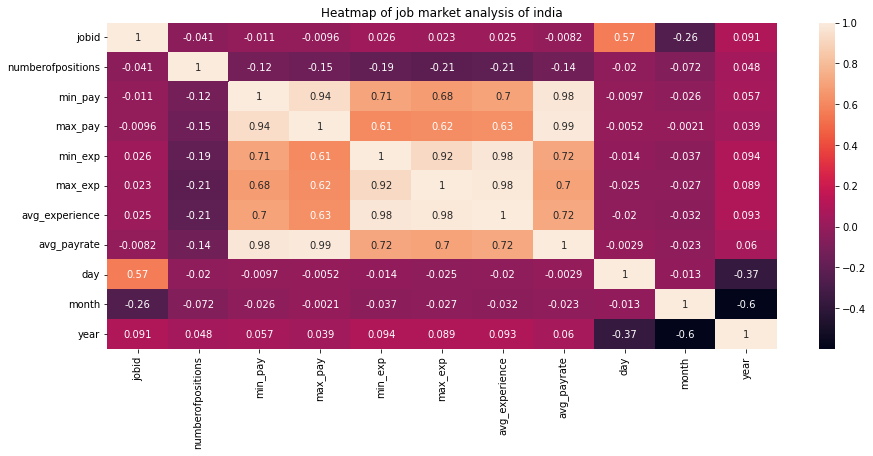

In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True)
plt.title('Heatmap of job market analysis of india')

**Company Based Analysis**

In [ ]:
data.columns

Index(['company', 'education', 'industry', 'jobdescription', 'jobid',
       'joblocation_address', 'jobtitle', 'numberofpositions', 'site_name',
       'skills', 'min_pay', 'max_pay', 'min_exp', 'max_exp', 'avg_experience',
       'avg_payrate', 'day', 'month', 'year'],
      dtype='object')

In [ ]:
comp=data['company'].value_counts().reset_index()

In [ ]:
comp.columns=['company','Number of jobs']

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

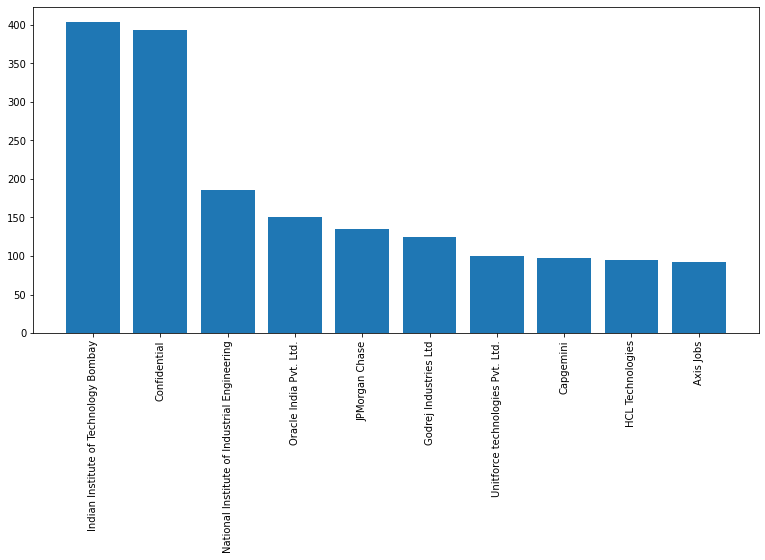

In [ ]:
# Barplot of compavies vs Number of jobs
plt.figure(figsize=(13,6))
plt.bar(comp['company'][0:10],comp['Number of jobs'][0:10])
plt.xticks(rotation='vertical')

(array([], dtype=float64), <a list of 0 Text major ticklabel objects>)

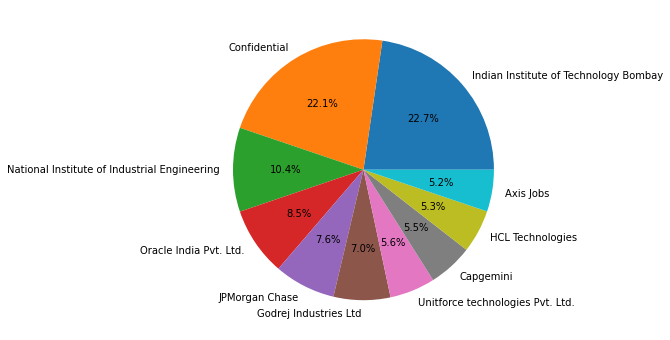

In [ ]:
# Pieplot of compavies vs Number of jobs
def my_values(x):
    # print(x)
    return '{:.1f}%'.format(x, total*x/100)
total=len(comp['Number of jobs'])
plt.figure(figsize=(15,6))
plt.pie(labels=comp['company'][0:10],x=comp['Number of jobs'][0:10],autopct=my_values)
plt.xticks(rotation='vertical')

In [ ]:
# Automating the code
def perform_analysis(data,feature,col1,col2,chart=1):
  dataframe=data[feature].value_counts().reset_index()
  dataframe.columns=[col1,col2]

  if chart==1:
    plt.figure(figsize=(13,6))
    plt.bar(dataframe[col1][0:10],dataframe[col2][0:10][0:10])
    plt.xticks(rotation='vertical')
    print(dataframe.head())
  elif chart==2:
    def my_values(x):
      # print(x)
      return '{:.1f}%'.format(x, total*x/100)
    print(dataframe.head())
    total=len(dataframe[col1])
    plt.figure(figsize=(15,6))
    plt.pie(labels=dataframe[col1][0:10],x=dataframe[col2][0:10][0:10],autopct=my_values)
    # plt.pie(labels=dataframe[col1][0:10],x=dataframe[col2][0:10][0:10])
    plt.xticks(rotation='vertical')

                                        company  Number of jobs
0         Indian Institute of Technology Bombay             403
1                                  Confidential             393
2  National Institute of Industrial Engineering             185
3                        Oracle India Pvt. Ltd.             151
4                                JPMorgan Chase             135


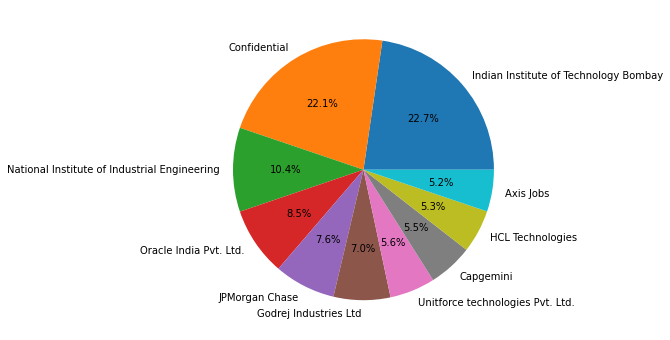

In [ ]:
perform_analysis(data,'company','company','Number of jobs',2)

                                        company  Number of jobs
0         Indian Institute of Technology Bombay             403
1                                  Confidential             393
2  National Institute of Industrial Engineering             185
3                        Oracle India Pvt. Ltd.             151
4                                JPMorgan Chase             135


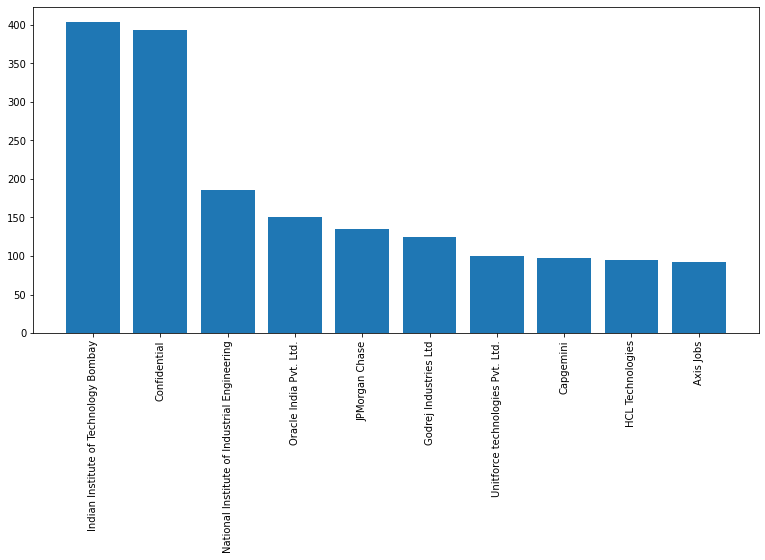

In [ ]:
perform_analysis(data,'company','company','Number of jobs',1)

**Industry Based Analysis**

                               industries  no of jobs
0         IT-Software / Software Services        9216
1         Education / Teaching / Training        1322
2                BPO / Call Centre / ITES        1254
3  Banking / Financial Services / Broking        1238
4                  Recruitment / Staffing        1129


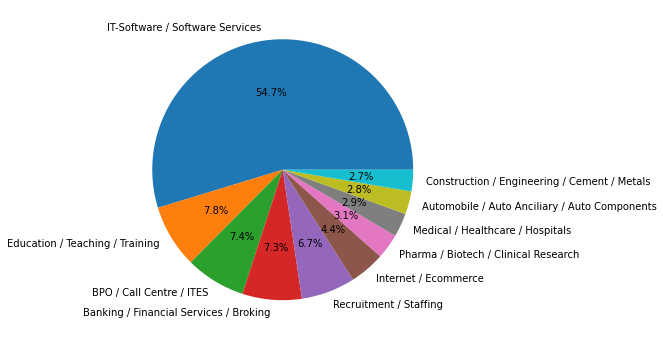

In [ ]:
perform_analysis(data,'industry','industries','no of jobs',2)

**Job Title Analysis**

In [ ]:
data.columns

Index(['company', 'education', 'industry', 'jobdescription', 'jobid',
       'joblocation_address', 'jobtitle', 'numberofpositions', 'site_name',
       'skills', 'min_pay', 'max_pay', 'min_exp', 'max_exp', 'avg_experience',
       'avg_payrate', 'day', 'month', 'year'],
      dtype='object')

                        jobtitles  no of jobtitle
0  Business Development Executive              93
1    Business Development Manager              92
2               Software Engineer              81
3                 Project Manager              67
4               Android Developer              65


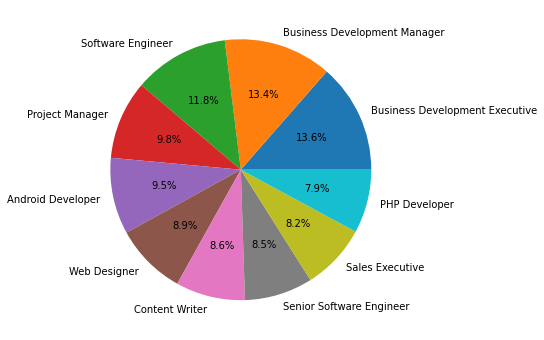

In [ ]:
perform_analysis(data,'jobtitle','jobtitles','no of jobtitle',2)

**Skills Based Analysis**

                                  skills  counts
0  IT Software - Application Programming    5989
1                                  Sales    2893
2                                   ITES    1640
3                               Teaching    1091
4                                     HR     928


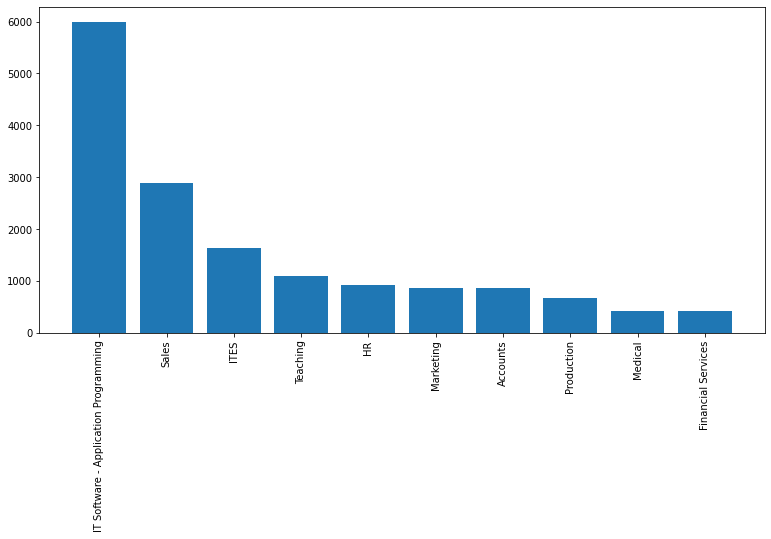

In [ ]:
perform_analysis(data,'skills','skills','counts',1)

**Job location vs no of jobs**

In [ ]:
data.head()

,company,education,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,site_name,skills,min_pay,max_pay,min_exp,max_exp,avg_experience,avg_payrate,day,month,year
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,NaN,ITES,150000.0,225000.0,0.0,1.0,0.5,187500.0,21.0,5.0,2016.0
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,NaN,Marketing,150000.0,250000.0,0.0,0.0,0.0,200000.0,21.0,5.0,2016.0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bangalore,Pl/sql Developer - SQL,NaN,NaN,IT Software - Application Programming,NaN,NaN,4.0,8.0,6.0,NaN,13.0,10.0,2016.0
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,81016900536,"Mumbai, Bangalore, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,NaN,Accounts,NaN,NaN,11.0,15.0,13.0,NaN,13.0,10.0,2016.0
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,120916002122,Bangalore,JAVA Technical Lead (6-8 yrs) -,4.0,NaN,IT Software - Application Programming,NaN,NaN,6.0,8.0,7.0,NaN,13.0,10.0,2016.0


               Job Location  Number of jobs
0                 Bangalore            5228
1                    Mumbai            2862
2                     Delhi            2389
3  Hyderabad / Secunderabad            1246
4                   Chennai            1204


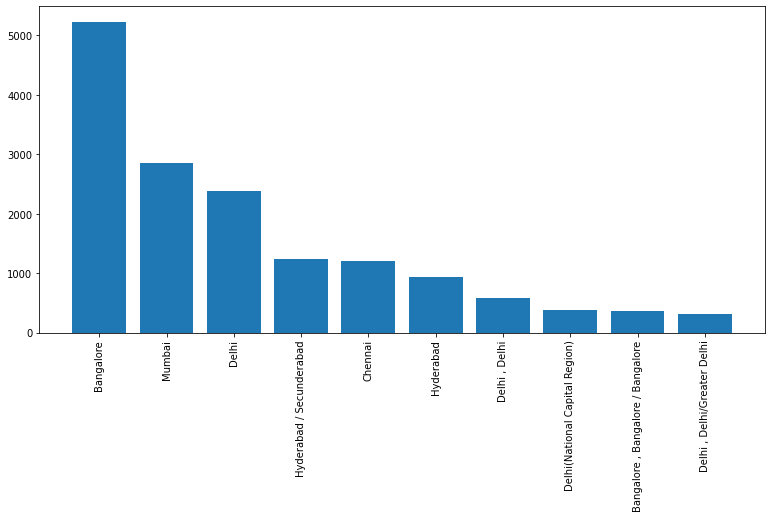

In [ ]:
perform_analysis(data,'joblocation_address','Job Location','Number of jobs',1)

**Relationship between Experience and Payrate**

Text(0.5, 1.0, 'Stripplot between min_exp and min_pay')

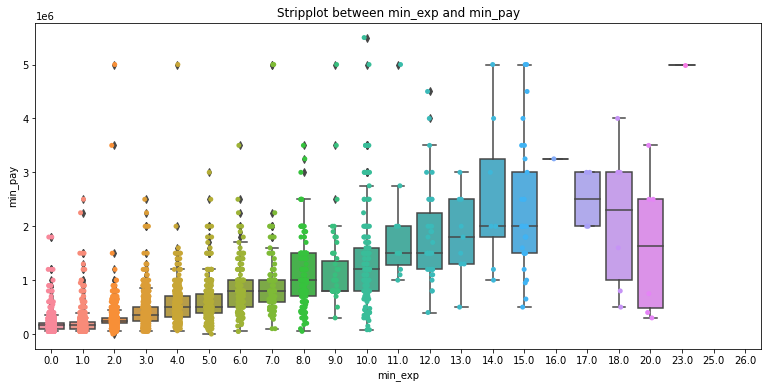

In [ ]:
plt.figure(figsize=(13,6))
sns.stripplot(x='min_exp',y='min_pay',data=data)
sns.boxplot(x='min_exp',y='min_pay',data=data)
plt.title("Stripplot between min_exp and min_pay")

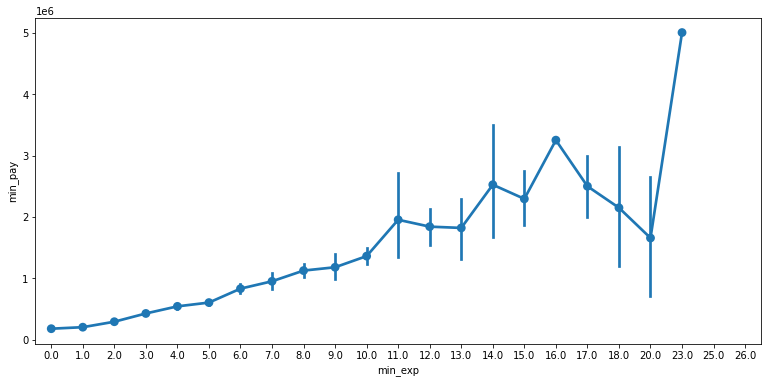

In [ ]:
plt.figure(figsize=(13,6))
sns.pointplot(x='min_exp', y='min_pay', data=data)

Text(0.5, 1.0, 'Stripplot between max_exp and max_pay')

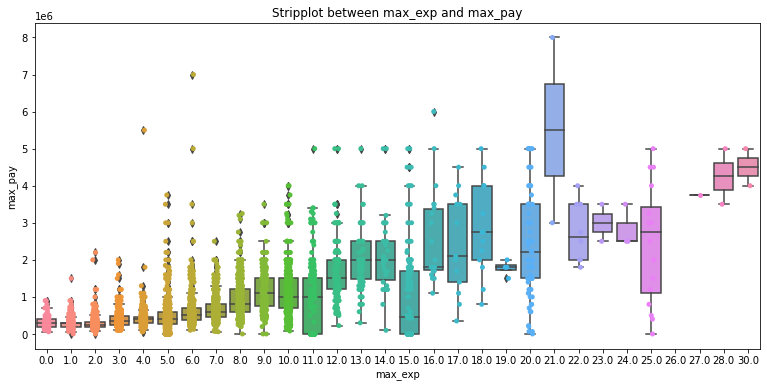

In [ ]:
plt.figure(figsize=(13,6))
sns.stripplot(x='max_exp',y='max_pay',data=data)
sns.boxplot(x='max_exp',y='max_pay',data=data)
plt.title("Stripplot between max_exp and max_pay")

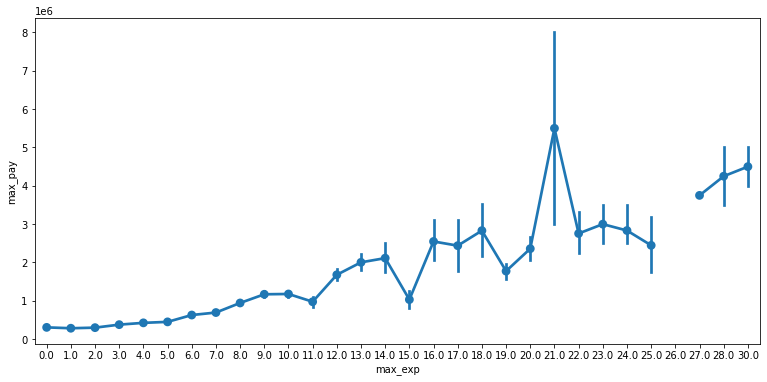

In [ ]:
plt.figure(figsize=(13,6))
sns.pointplot(x='max_exp', y='max_pay', data=data)

In [ ]:
df.head()

,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,payrate,...,uniq_id,min_pay,max_pay,min_exp,max_exp,avg_experience,avg_payrate,day,month,year
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,"1,50,000 - 2,25,000 P.A",...,43b19632647068535437c774b6ca6cf8,150000.0,225000.0,0.0,1.0,0.5,187500.0,21.0,5.0,2016.0
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,"1,50,000 - 2,50,000 P.A. 20000",...,d4c72325e57f89f364812b5ed5a795f0,150000.0,250000.0,0.0,0.0,0.0,200000.0,21.0,5.0,2016.0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,4 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bengaluru,Pl/sql Developer - SQL,NaN,Not Disclosed by Recruiter,...,c47df6f4cfdf5b46f1fd713ba61b9eba,NaN,NaN,4.0,8.0,6.0,NaN,13.0,10.0,2016.0
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,11 - 15 yrs,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,81016900536,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,Not Disclosed by Recruiter,...,115d28f140f694dd1cc61c53d03c66ae,NaN,NaN,11.0,15.0,13.0,NaN,13.0,10.0,2016.0
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,6 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,120916002122,Bengaluru,JAVA Technical Lead (6-8 yrs) -,4.0,Not Disclosed by Recruiter,...,a12553fc03bc7bcced8b1bb8963f97b4,NaN,NaN,6.0,8.0,7.0,NaN,13.0,10.0,2016.0


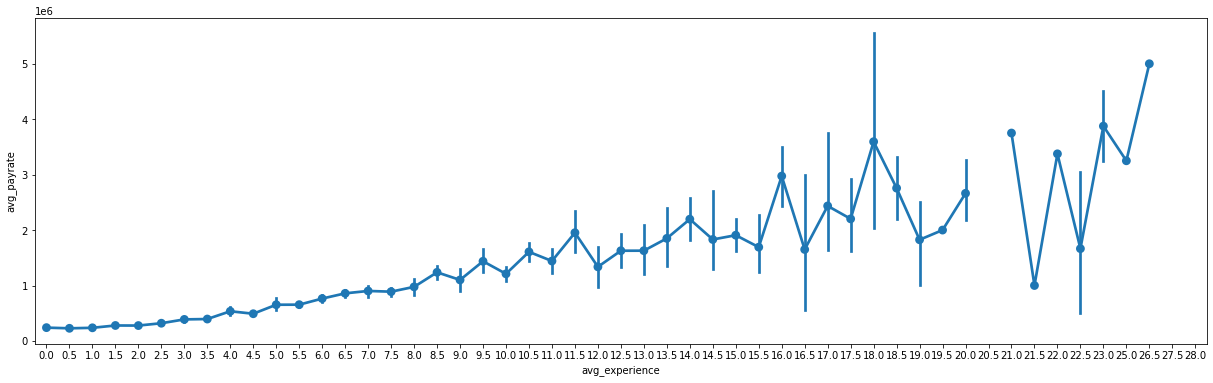

In [ ]:
plt.figure(figsize=(21,6))
sns.pointplot(x='avg_experience', y='avg_payrate', data=data)

In [ ]:
#Top 10 rated skills based on maximum pay
data[['max_pay','industry']].groupby(['industry']).median().sort_values(by='max_pay',ascending=False).head(10)

,max_pay
industry,
Pulp and Paper,1312500.0
Strategy / Management Consulting Firms,1200000.0
Glass / Glassware,1025000.0
Telecom/ISP,950000.0
Tyres,900000.0
Ceramics / Sanitary ware,900000.0
IT-Software / Software Services,800000.0
Aviation / Aerospace Firms,800000.0
Water Treatment / Waste Management,800000.0


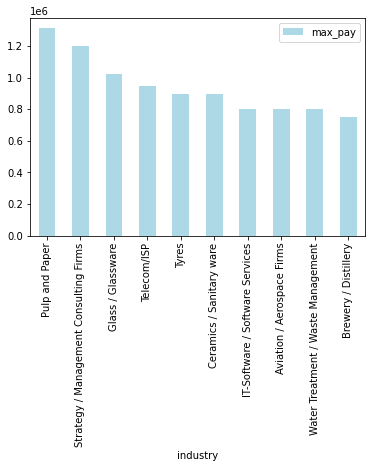

In [ ]:
data[['max_pay','industry']].groupby(['industry']).median().sort_values(by='max_pay',ascending=False).head(10).plot(kind='bar',color='lightblue')

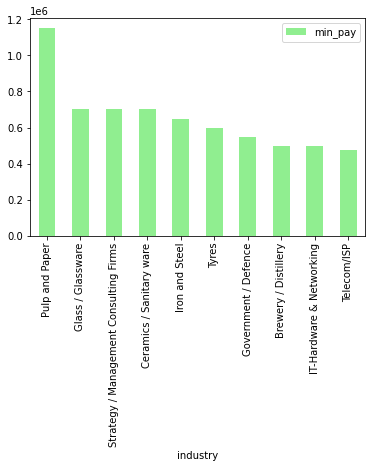

In [ ]:
data[['min_pay','industry']].groupby(['industry']).median().sort_values(by='min_pay',ascending=False).head(10).plot(kind='bar',color='lightgreen')

In [ ]:
data.columns

Index(['company', 'education', 'industry', 'jobdescription', 'jobid',
       'joblocation_address', 'jobtitle', 'numberofpositions', 'site_name',
       'skills', 'min_pay', 'max_pay', 'min_exp', 'max_exp', 'avg_experience',
       'avg_payrate', 'day', 'month', 'year'],
      dtype='object')

In [ ]:
data['skills'].nunique()

45

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 <a list of 45 Text major ticklabel objects>)

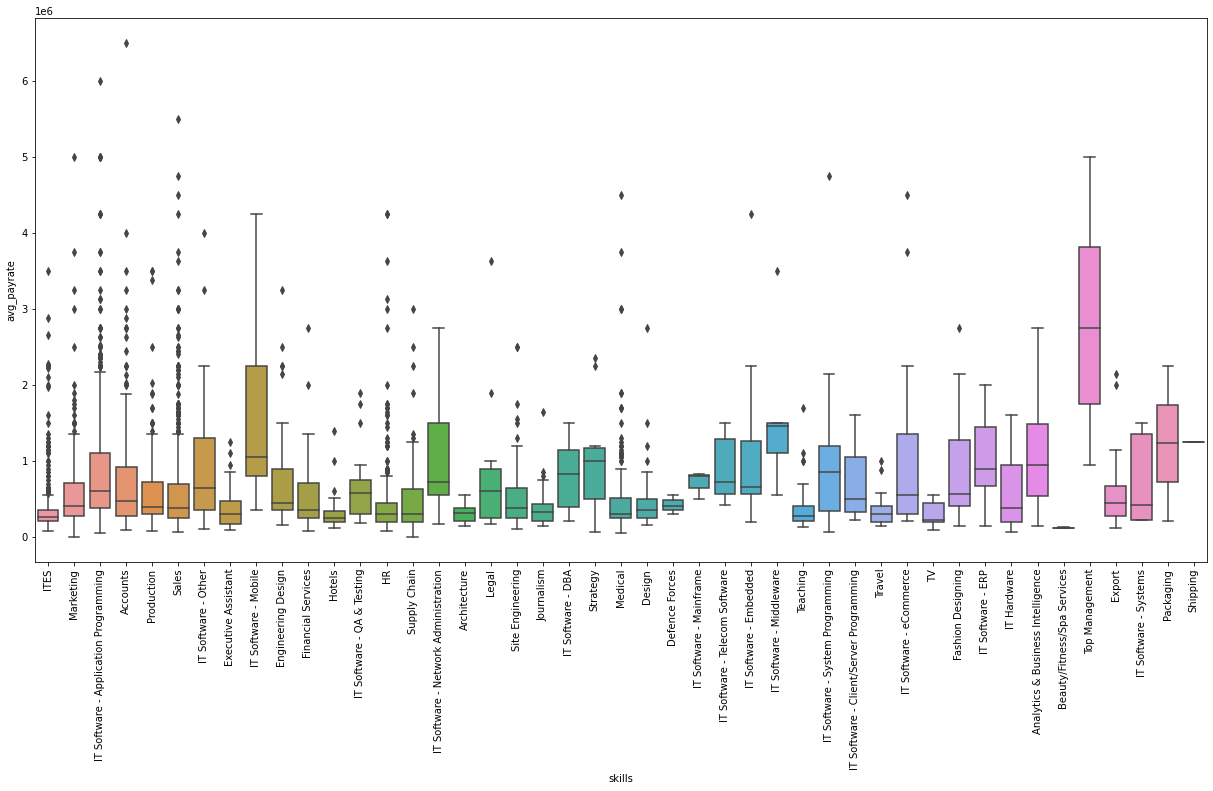

In [ ]:
plt.figure(figsize=(21,10))
sns.boxplot(x='skills',y='avg_payrate',data=data)
plt.xticks(rotation='vertical')

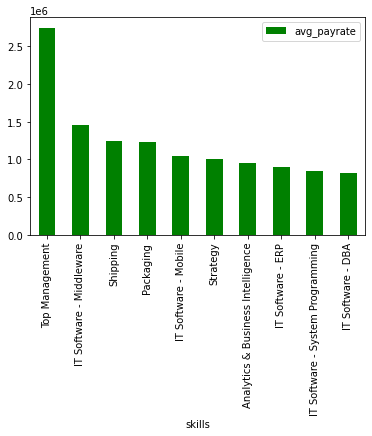

In [ ]:
# Barplot of average payrate and skills
data[['avg_payrate','skills']].groupby(['skills']).median().sort_values(by='avg_payrate',ascending=False).head(10).plot(kind='bar',color='green')

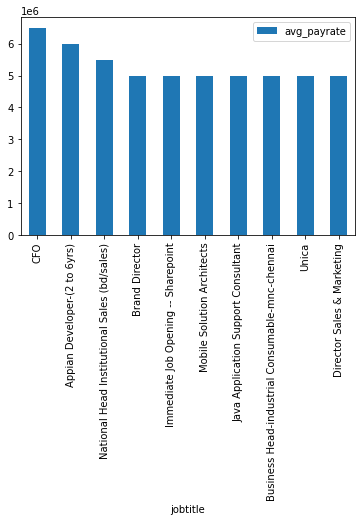

In [ ]:
# Barplot of average payrate and jobtitles
data[['avg_payrate','jobtitle']].groupby(['jobtitle']).median().sort_values(by='avg_payrate',ascending=False).head(10).plot(kind='bar')

**Analyse the available position in the industry**

In [ ]:
data['numberofpositions'].nunique()

84

In [ ]:
#top 10 industries with maximum number of positions in india
data.groupby('industry')['numberofpositions'].sum().sort_values(ascending=False).head(10)

industry
BPO / Call Centre / ITES                               90777.0
Medical / Healthcare / Hospitals                       40755.0
IT-Software / Software Services                        21180.0
Travel / Hotels / Restaurants / Airlines / Railways    10421.0
Pharma / Biotech / Clinical Research                   10253.0
Advertising / PR / MR / Event Management                5395.0
Fresher / Trainee / Entry Level                         3949.0
Automobile / Auto Anciliary / Auto Components           2498.0
Banking / Financial Services / Broking                  2281.0
Insurance                                               2087.0
Name: numberofpositions, dtype: float64

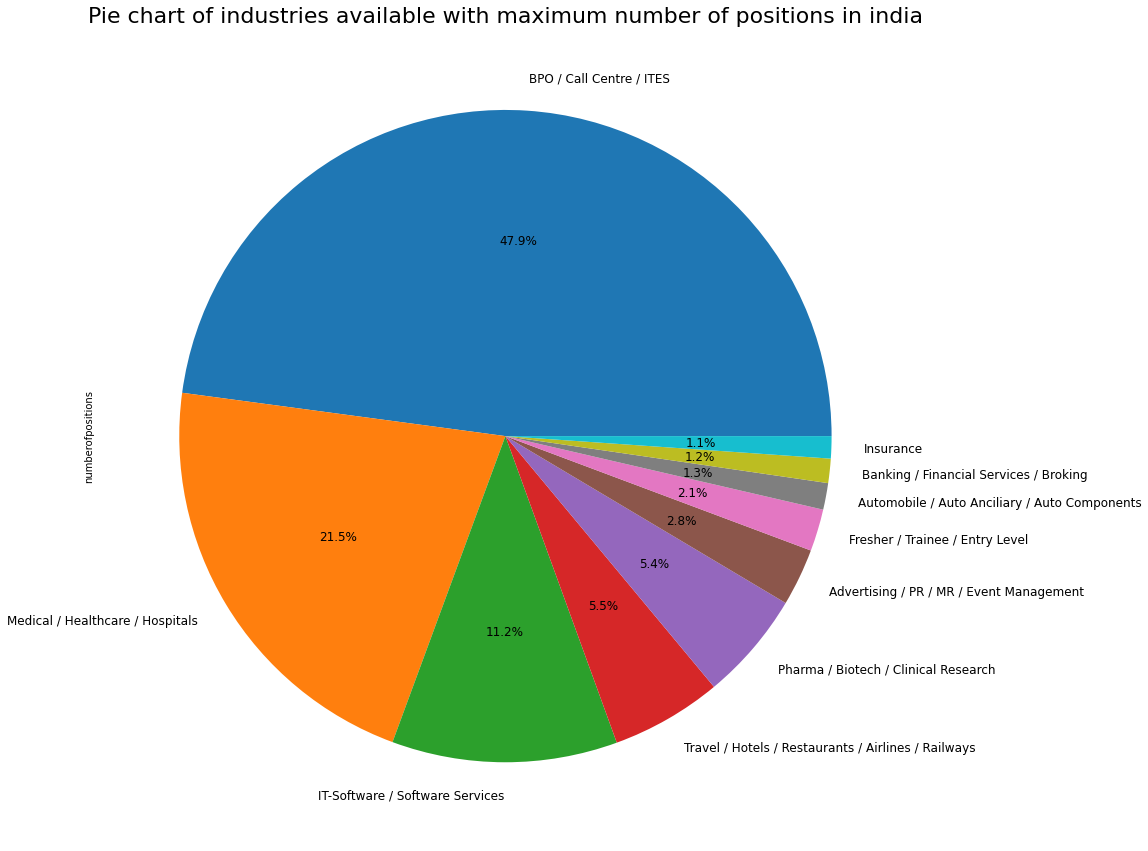

In [ ]:
plt.figure(figsize=(25,15))
data.groupby('industry')['numberofpositions'].sum().sort_values(ascending=False).head(10).plot(kind='pie',autopct='%1.1f%%',fontsize=12)
plt.title('Pie chart of industries available with maximum number of positions in india',fontsize=22)
plt.show()